In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp
import scipy as sc
np.random.seed(seed=1337)

In [2]:
N = 100
M = 500
df = pd.DataFrame(np.random.uniform(size=[N,M]))
df = df.cumsum()

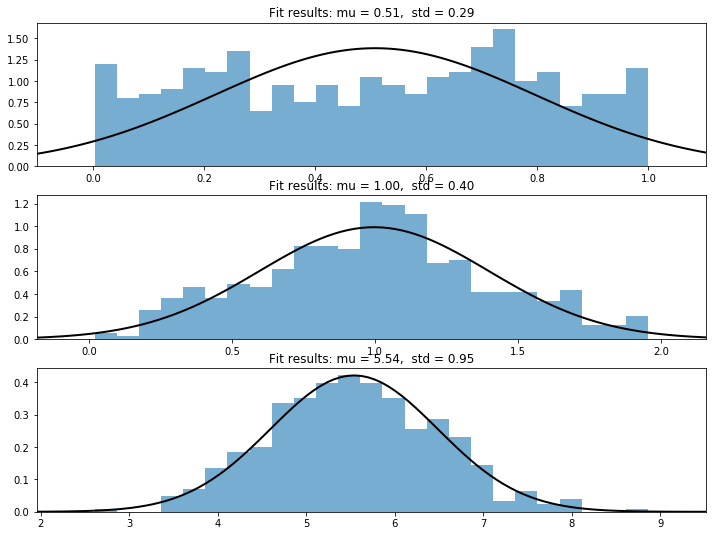

In [3]:
# Tth iteration slice
Tvals = [0,1,10]

fig = plt.figure(figsize=(12,3*len(Tvals)))
for idx, T in enumerate(Tvals):

    data = df.iloc[T,:].copy().values

    # Fit a normal distribution to the data:
    # https://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data
    mu, std = sc.stats.norm.fit(data)

    # Plot

    ax = fig.add_subplot(len(Tvals),1,idx+1)
    ax.hist(data, bins=25, density=True, alpha=0.6)

    eps = (ax.get_xlim()[1] - ax.get_xlim()[0]) / 100 * 5
    xmin = ax.get_xlim()[0] - eps
    xmax = ax.get_xlim()[1] + eps
    ax.set_xlim(xmin, xmax)
    x = np.linspace(xmin, xmax, 100)
    p = sc.stats.norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    _ = ax.set_title(title)

In [4]:
## uniform
#from sympy.stats import Uniform
#mixed = Uniform('u1', 0, 1) + Uniform('u2', 0, 1)
#x = sp.symbols("x")
#d = sp.stats.density(mixed)(x)
#display(d.simplify())
#_ = sp.plot(d, (x,-6, 6))

In [5]:
## random
#from sympy.stats import Normal
#mixed = Normal('n1', 0, 1) +  Normal('n2', 0, 1)
#x = sp.symbols("x")
#d = sp.stats.density(mixed)(x)
#display(d.simplify())
#_ = sp.plot(d, (x,-6, 6))

## Using explicit formulas
Technical Incerto vol 1 chapter 7.3

### Unifrom

$ \phi_n (x) = \sum_{k=0}^{\text{floor(x)}} (-1)^k  {n \choose k} \big( \frac{x-L}{H-L} - k \big)^{n-1} $ for $0 \leq x \leq n$

In [6]:
# Currently wokring one with alternative definition
n = 5
step = 0.1
x = list(np.arange(0,n+step,step))

arr = np.empty((n,len(x)))
for ni in range(1,n+1):
    for xidx,xi in enumerate(x):
        arrtmp = np.empty((int(np.floor(xi))+1))
        for k in list(range(0,int(np.floor(xi))+1)):
            arrtmp[k] = np.power(-1,k) * sc.special.comb(ni,k) * np.power(xi-k,ni-1)
        arr[ni-1, xidx] = np.sum(arrtmp) / (np.math.factorial(ni-1))

In [7]:
# x=1 does not work when n=1...
n = 1
myx = 1
k = 0
print(np.power(-1,k))
print(sc.special.comb(n,k))
print(np.power(myx-k,n-1))
print('-'*30)

n = 1
myx = 1
k = 1
print(np.power(-1,k))
print(sc.special.comb(n,k))
print(np.power(myx-k,n-1))


1
1.0
1
------------------------------
-1
1.0
1


Alternative specification
$ \phi_n (x) = \sum_{k=0}^n (-1)^k  {n \choose k} \big( \frac{x-L}{H-L} - k \big)^{n-1} sgn \big( \frac{x-L}{H-L} - k \big) $ for $nL \leq x \leq nH$

Technical incerto missing a scaling term? Compare to this:
https://en.wikipedia.org/wiki/Irwin%E2%80%93Hall_distribution

Cannot understand why this does not work....

In [8]:
#n = 1
#H = 1
#L = 0
#
#x = np.arange(0,2,0.1)
#arr = np.empty((n,len(x)))
#
##for ni in range(1,n+1):
#arrtmp = np.empty((n+1,len(x)))
#for k in range(0,n+1):
#    #arrtmp[k,:] = np.power(-1,k) * sc.special.comb(n,k) * np.power((x-L)/(H-L) - k , n-1) * np.sign((x-L)/(H-L) -k)
#    arrtmp[k,:] = np.power(-1,k) * sc.special.comb(n,k) * np.power(x-k,n-1) * np.sign(x-k)
#arr[n-1, :] = np.sum(arrtmp, axis=0)
#
#arr[n-1, :] = arr[n-1, :] / (np.math.factorial(n-1))

In [9]:
#n=1
#x = 0.5
#k=0
#print(np.power(-1,k))
#print(sc.special.comb(n,k))
#print(np.power(x-k,n-1))
#print(np.sign(x-k))
#print('-'*30)
#
#n=1
#x = 0.5
#k=1
#print(np.power(-1,k))
#print(sc.special.comb(n,k))
#print(np.power(x-k,n-1))
#print(np.sign(x-k))

(0, 4)

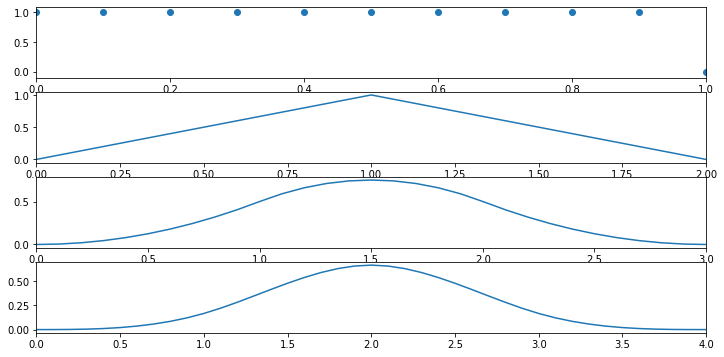

In [10]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(4,1,1)
_ = ax.scatter(x, arr[0,:])
ax.set_xlim((0,1))

ax = fig.add_subplot(4,1,2)
_ = ax.plot(x, arr[1,:])
ax.set_xlim((0,2))

ax = fig.add_subplot(4,1,3)
_ = ax.plot(x, arr[2,:])
ax.set_xlim((0,3))

ax = fig.add_subplot(4,1,4)
_ = ax.plot(x, arr[3,:])
ax.set_xlim((0,4))